## Marfa Zakirova, B06-906a

# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,363,89,47,85,147,58,10,153,44,19,151,175,349,186,74,13,7,186,197
1,799,92,39,76,180,71,6,152,43,19,131,179,350,143,72,6,14,195,200
2,699,93,47,83,165,60,7,167,40,20,147,197,417,201,73,12,4,187,192
3,109,99,48,79,199,68,6,185,35,22,153,202,524,171,74,5,8,195,195
4,404,103,48,101,204,62,12,200,33,23,158,215,595,164,66,8,22,192,202
5,328,93,43,88,170,66,9,150,45,19,147,164,334,143,65,2,17,196,206
6,617,83,37,49,112,55,5,122,55,17,128,144,219,146,85,8,16,180,184
7,307,107,52,103,186,57,11,214,31,24,162,217,676,189,66,6,5,189,198
8,668,94,46,91,175,70,12,157,43,20,155,172,358,192,69,15,21,190,200
9,437,84,40,71,131,55,7,150,45,19,134,167,330,165,80,12,1,180,186


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,421.209472,93.979964,45.000000,82.564663,170.608379,62.052823,8.735883,170.342441,40.613843,20.70674,148.214936,190.440801,448.391621,175.735883,72.938069,6.331512,12.515483,188.732240,195.393443
std,248.429097,8.441164,6.239151,15.956428,34.468297,8.884033,5.421757,34.077563,7.970078,2.65669,14.690272,32.749361,182.089107,33.558498,7.908913,4.872024,8.845296,6.088106,7.289255
min,0.000000,73.000000,33.000000,40.000000,105.000000,47.000000,3.000000,112.000000,26.000000,17.00000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,203.000000,88.000000,40.000000,70.000000,141.000000,57.000000,6.000000,148.000000,33.000000,19.00000,136.000000,168.000000,323.000000,148.000000,68.000000,2.000000,5.000000,184.000000,190.000000
50%,420.000000,93.000000,44.000000,81.000000,170.000000,61.000000,8.000000,159.000000,42.000000,20.00000,146.000000,181.000000,371.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,642.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,201.000000,45.000000,23.00000,161.000000,219.000000,607.000000,199.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.00000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations


**There are no NaN values, so no need to process them. Some features have a very large spread (0th for example), let's scale them. There is no categorial features, so let's apply scaler to the whole set**

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [7]:
from sklearn.metrics import f1_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import scikitplot

In [8]:
CV_model = GridSearchCV(estimator = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500), 
                        param_grid = {"C": np.logspace(-3, 3, num=7)},
                        cv = 5,
                        scoring = 'f1_macro')

CV_model = CV_model.fit(X_train_scaled, y_train)
y_test_predicted = CV_model.predict_proba(X_test_scaled)
y_train_pred_labels  = CV_model.predict(X_train_scaled)
y_test_pred_labels = CV_model.predict(X_test_scaled) #predicted labels

In [9]:
print(f'parameters: {CV_model.best_params_}')
print(f'test accuracy score: {np.round(accuracy_score(y_test, y_test_pred_labels),3)}')
print(f'test f1 score: {np.round(f1_score(y_test, y_test_pred_labels, average = "macro"),3)}')
print()
print(f'train accuracy score: {np.round(accuracy_score(y_train, y_train_pred_labels),3)}')
print(f'train f1 score: {np.round(f1_score(y_train, y_train_pred_labels, average = "macro"),3)}')

parameters: {'C': 100.0}
test accuracy score: 0.825
test f1 score: 0.822

train accuracy score: 0.821
train f1 score: 0.824


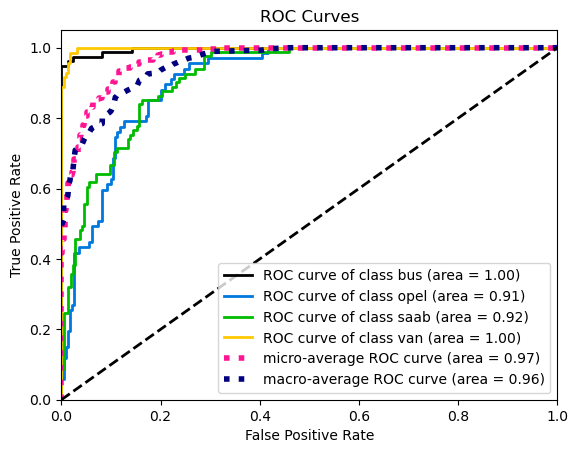

In [10]:
scikitplot.metrics.plot_roc(y_test, y_test_predicted)
None

In [11]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [13]:
pca_trial = PCA(random_state = 10)
x_train_pca = pca_trial.fit_transform(X_train_scaled)

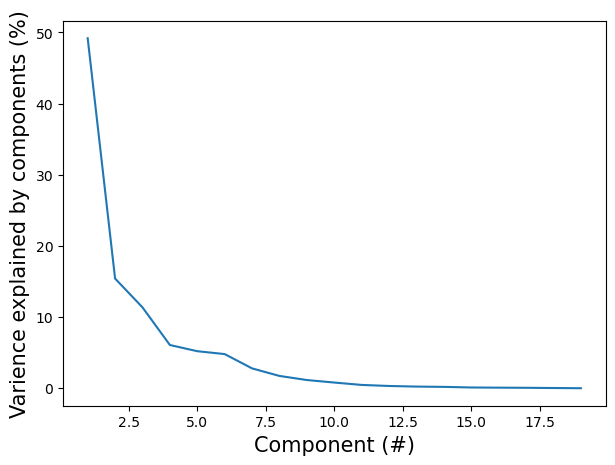

In [14]:
plt.figure(figsize=(7, 5))
grid = np.arange(pca_trial.components_.shape[0]) + 1
plt.plot(grid, pca_trial.explained_variance_ratio_ * 100, 
         label='')
plt.xlabel('Component (#)', fontsize = 15)
plt.ylabel('Varience explained by components (%)', fontsize = 15)
None

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

**We should apply component analysis on normalised data, to find unbiased directions that will correctly represent it. <br> 
As shown, train data can be represented via first 11 components with minimal loss of information. Variance ratio for the remaining main components is small, let 's neglect it.**

In [15]:
pca11 = PCA(n_components = 11, random_state = 10)
x_train_pca = pca11.fit_transform(X_train_scaled)
x_test_pca = pca11.transform(X_test_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [16]:
CV_log_model = GridSearchCV(estimator = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state = 10), 
                        param_grid = {'C': np.logspace(-3, 2, num=6)},
                        cv = 5,
                        scoring='f1_macro')


CV_log_model = CV_log_model.fit(x_train_pca, y_train)
y_test_log_predicted = CV_log_model.predict_proba(x_test_pca)
y_test_log_pred_labels = CV_log_model.predict(x_test_pca) 
y_train_log_pred_labels = CV_log_model.predict(x_train_pca) 

parameters: {'C': 100.0}
test accuracy score: 0.721
test f1 score: 0.719

train accuracy score: 0.734
train f1 score: 0.73


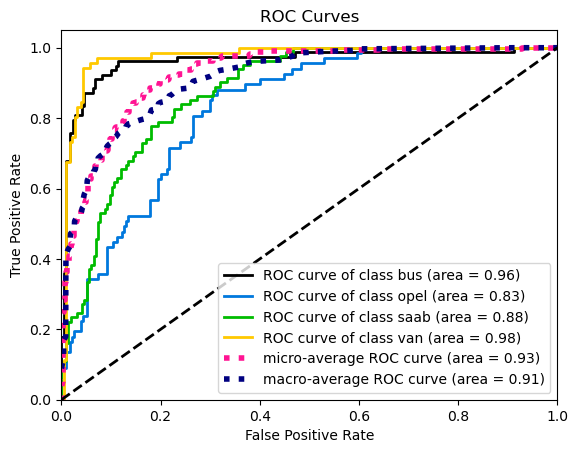

In [17]:
print(f'parameters: {CV_log_model.best_params_}')
print(f'test accuracy score: {np.round(accuracy_score(y_test, y_test_log_pred_labels),3)}')
print(f'test f1 score: {np.round(f1_score(y_test, y_test_log_pred_labels, average = "macro"),3)}')
print()
print(f'train accuracy score: {np.round(accuracy_score(y_train, y_train_log_pred_labels),3)}')
print(f'train f1 score: {np.round(f1_score(y_train, y_train_log_pred_labels, average = "macro"),3)}')

scikitplot.metrics.plot_roc(y_test, y_test_log_predicted)
None

**Quality decreased as by overall score(accuracy, f1), and as for each target class. That is expected, since when using projections, we lose some of the data <br>
Let's scale PCA data**

In [18]:
scaler = StandardScaler()
x_train_pca_scaled = scaler.fit_transform(x_train_pca)
x_test_pca_scaled = scaler.transform(x_test_pca)

In [19]:
CV_pca_lr_model = GridSearchCV(estimator = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state = 10), 
                        param_grid = {'C': np.logspace(-3, 2, num=6)},
                        cv = 5,
                        scoring='f1_macro')


CV_pca_lr_model = CV_pca_lr_model.fit(x_train_pca_scaled, y_train)
y_train_log_pred_labels = CV_pca_lr_model.predict(x_train_pca_scaled) 
y_test_log_predicted = CV_pca_lr_model.predict_proba(x_test_pca_scaled)
y_test_log_pred_labels = CV_pca_lr_model.predict(x_test_pca_scaled) 

parameters: {'C': 1.0}
test accuracy score: 0.741
test f1 score: 0.738

train accuracy score: 0.743
train f1 score: 0.739


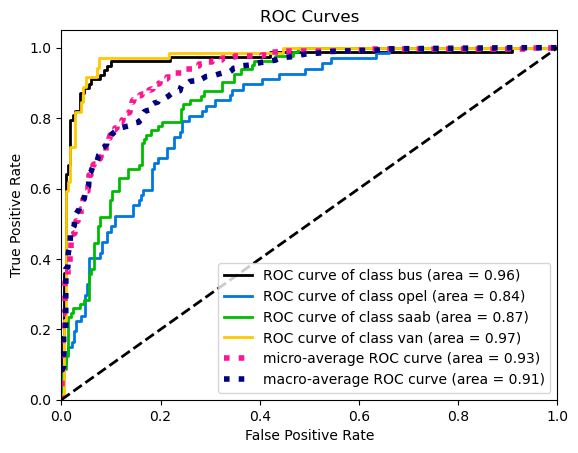

In [20]:
print(f'parameters: {CV_pca_lr_model.best_params_}')
print(f'test accuracy score: {np.round(accuracy_score(y_test, y_test_log_pred_labels),3)}')
print(f'test f1 score: {np.round(f1_score(y_test, y_test_log_pred_labels, average = "macro"),3)}')
print()
print(f'train accuracy score: {np.round(accuracy_score(y_train, y_train_log_pred_labels),3)}')
print(f'train f1 score: {np.round(f1_score(y_train, y_train_log_pred_labels, average = "macro"),3)}')

scikitplot.metrics.plot_roc(y_test, y_test_log_predicted)
None

**The quality has increased, further we will use the РСA data with scaling**

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [21]:
from sklearn.tree import DecisionTreeClassifier

CV_tree_model = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = {'max_depth': np.arange(1, 20)},
                        cv = 5,
                        scoring='f1_macro')


CV_tree_model = CV_tree_model.fit(x_train_pca_scaled, y_train)
y_test_tree_predicted = CV_tree_model.predict_proba(x_test_pca_scaled)
y_test_tree_pred_labels = CV_tree_model.predict(x_test_pca_scaled)
y_train_tree_pred_labels = CV_tree_model.predict(x_train_pca_scaled)

best max_depth parameter: 16
test accuracy score: 0.566
test f1 score: 0.568

train accuracy score: 1.0
train f1 score: 1.0


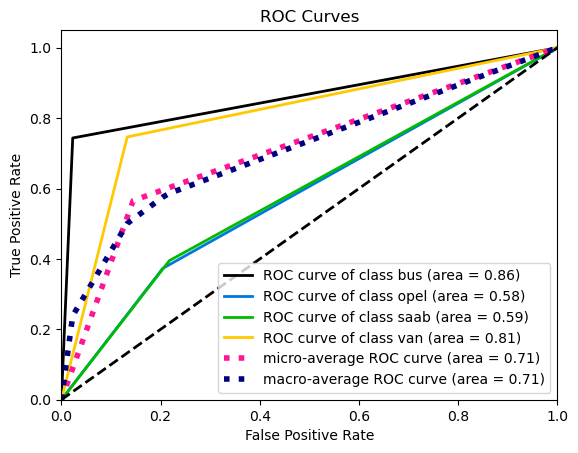

In [22]:
print(f'best max_depth parameter: {CV_tree_model.best_params_["max_depth"]}')
print(f'test accuracy score: {np.round(accuracy_score(y_test, y_test_tree_pred_labels),3)}')
print(f'test f1 score: {np.round(f1_score(y_test, y_test_tree_pred_labels, average = "macro"),3)}')
print()
print(f'train accuracy score: {np.round(accuracy_score(y_train, y_train_tree_pred_labels),3)}')
print(f'train f1 score: {np.round(f1_score(y_train, y_train_tree_pred_labels, average = "macro"),3)}')

scikitplot.metrics.plot_roc(y_test, y_test_tree_predicted)
None

**The quality has dropped**

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [32]:
from sklearn.ensemble import BaggingClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning

In [33]:
def ploting(accuracy_train_store, accuracy_test_store, f1_train_store, f1_test_store, name):
    N = np.arange(2,100,5)
    plt.figure(figsize=(20,15))
    for i in range(2):
        ax = plt.subplot(2, 2, i+1)
        if i:
            ax.plot(N, accuracy_train_store, label='train')
            ax.plot(N, accuracy_test_store, label='test')
            ax.set_ylabel('accuracy')
            ax.set_xlabel('# estimators')
            ax.set_title(f'{name}, acc')
            ax.legend()
        else:
            ax.plot(N, f1_train_store, label='train')
            ax.plot(N, f1_test_store, label='test')
            ax.set_ylabel('f1 score')
            ax.set_xlabel('# estimators')
            ax.set_title(f'{name}, f1')
            ax.legend()        
    plt.show()   


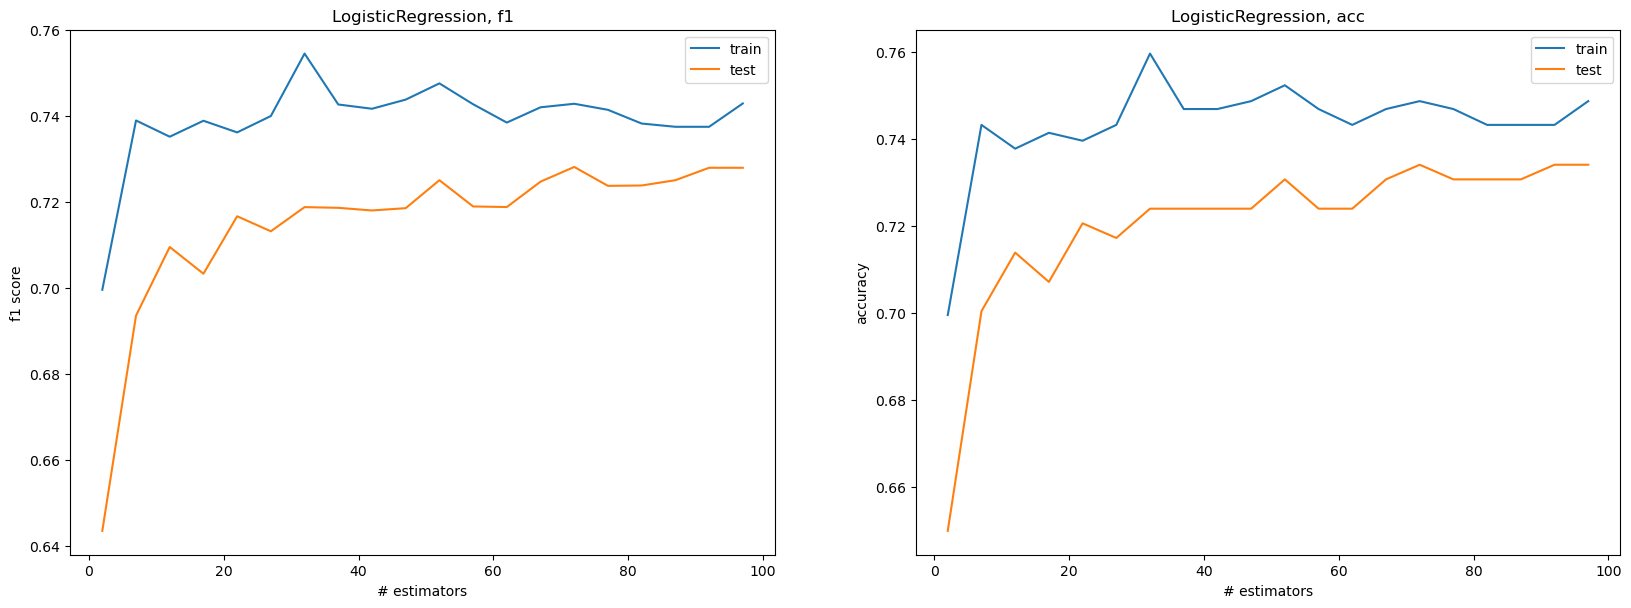

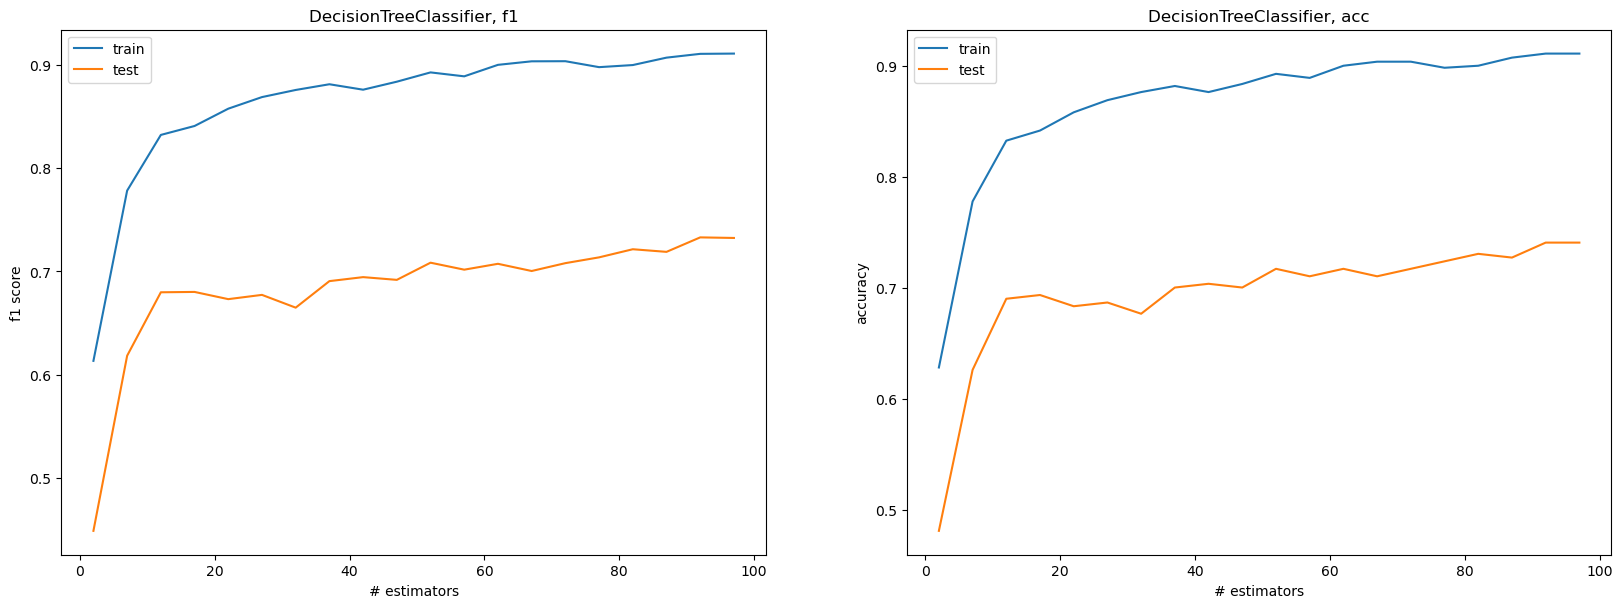

In [35]:
model = [LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state = 10),
        DecisionTreeClassifier()]
N = np.arange(2,100,5)

for estim in model:
    f1_train_store = []
    f1_test_store = []
    accuracy_train_store = []
    accuracy_test_store = []
    for n_algo in N:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", category=ConvergenceWarning)
                bagging = BaggingClassifier(base_estimator = estim, 
                                            n_estimators = n_algo, 
                                            bootstrap = True, 
                                            random_state = 10, max_samples = N[-1])
                bagging.fit(x_train_pca_scaled, y_train)
                y_train_pred = bagging.predict(x_train_pca_scaled)
                y_test_pred = bagging.predict(x_test_pca_scaled)

                f1_train_store.append(f1_score(y_train, y_train_pred, average ='macro'))
                f1_test_store.append(f1_score(y_test, y_test_pred, average ='macro'))
                accuracy_train_store.append(accuracy_score(y_train, y_train_pred))
                accuracy_test_store.append(accuracy_score(y_test, y_test_pred))
        
    ploting(accuracy_train_store, accuracy_test_store, f1_train_store, f1_test_store, name = str(estim).split("(")[0])

* **Ensembles of decision trees show better quality on training set, however results on test set are pretty the same, which shows how much trees can retrain. It looks like 40 basic models are enough, then quality on test set slightly changes**
* **Hyperparameters found in 2.5 do not have to be optimal in this task, since they are determined by the set, and in this case it is bootstrap**

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [26]:
from sklearn.ensemble import RandomForestClassifier

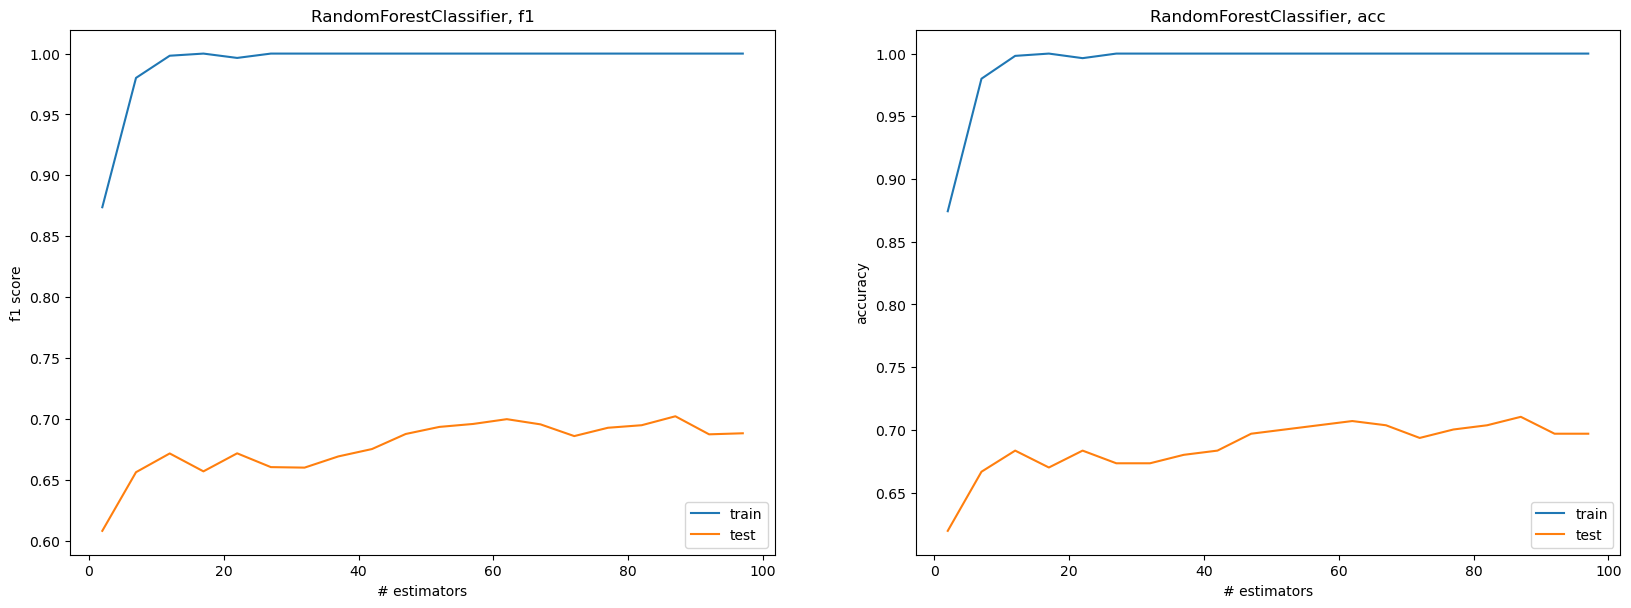

In [27]:
f1_train_store = []
f1_test_store = []
accuracy_train_store = []
accuracy_test_store = []
for n_tree in N:
    forest = RandomForestClassifier(n_estimators = n_tree,
                                   random_state = 10)
    forest.fit(x_train_pca_scaled, y_train)
    y_train_pred = forest.predict(x_train_pca_scaled)
    y_test_pred = forest.predict(x_test_pca_scaled)

    f1_train_store.append(f1_score(y_train, y_train_pred, average ='macro'))
    f1_test_store.append(f1_score(y_test, y_test_pred, average ='macro'))
    accuracy_train_store.append(accuracy_score(y_train, y_train_pred))
    accuracy_test_store.append(accuracy_score(y_test, y_test_pred))

ploting(accuracy_train_store, accuracy_test_store, f1_train_store, f1_test_store, name = 'RandomForestClassifier')


**The dependence of the model on the number of trees is more stable, it requires 50-60 trees to achieve the same quality**

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [28]:
import math

In [36]:
n_obj = x_train_pca_scaled.shape[0]
model = {'LR' :CV_log_model, 
         'Tree': CV_tree_model, 
         'RandomForest':RandomForestClassifier(n_estimators = 40,random_state = 10)}

f1 = {k: [] for k in model.keys()}
acc = {k: [] for k in model.keys()}
frac = np.arange(1, 11) / 10

for i in frac:
    feat_train = x_train_pca_scaled[:math.floor(n_obj * i)]
    target_train = y_train[:math.floor(n_obj * i)]
    for name, est in model.items():
        with warnings.catch_warnings():
                warnings.simplefilter("ignore", category=ConvergenceWarning)
                est.fit(feat_train, target_train)
                pred = est.predict(x_test_pca_scaled)
                acc[name].append(accuracy_score(y_test, pred))
                f1[name].append(f1_score(y_test, pred, average = "macro"))

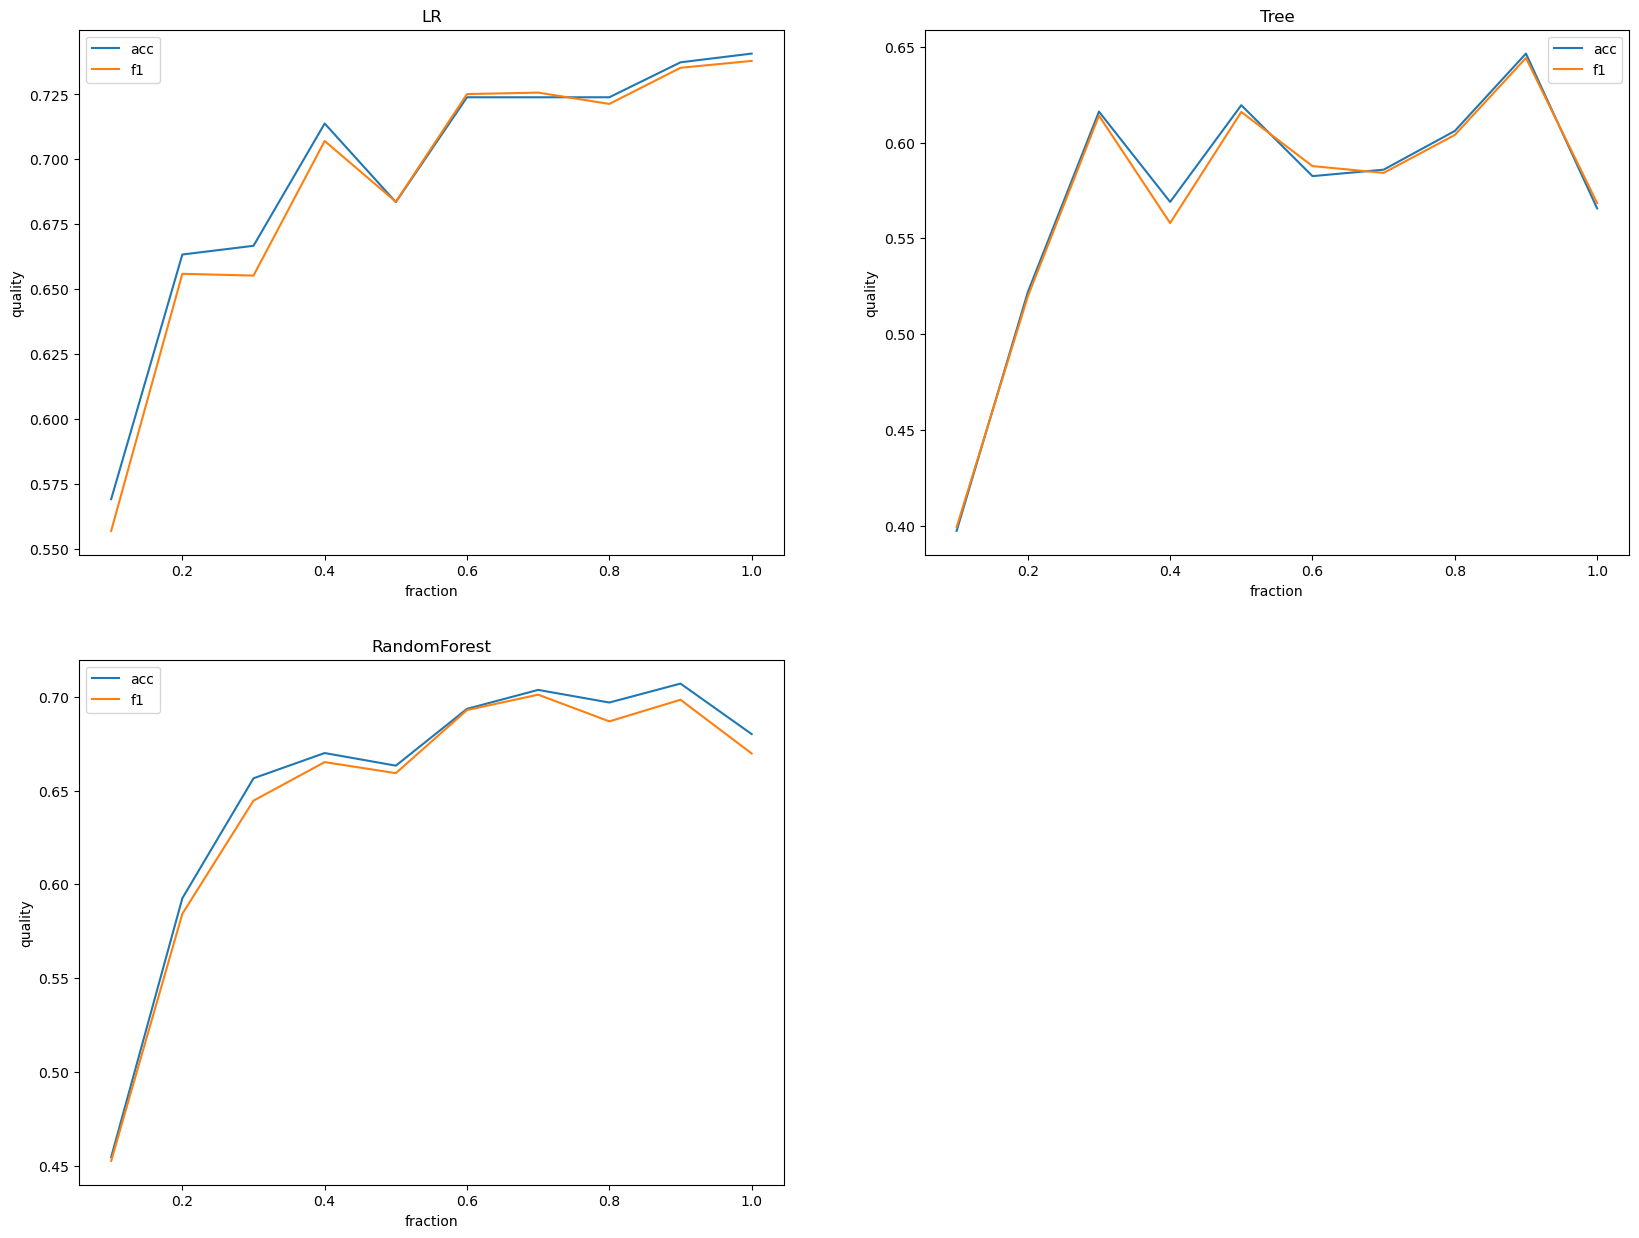

In [37]:
plt.figure(figsize=(20,15))

for i, name in enumerate(f1.keys()):    
    ax = plt.subplot(2, 2, i+1)
    ax.plot(frac, acc[name], label='acc')
    ax.plot(frac, f1[name], label='f1')
    ax.set_ylabel('quality')
    ax.set_xlabel('fraction')
    ax.set_title(name)
    ax.legend()      
plt.show()   

**General trend: the more data, the better the result**